In [3]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math


In [4]:
%matplotlib inline

In [5]:
m = n = l = 3 # L of square grid

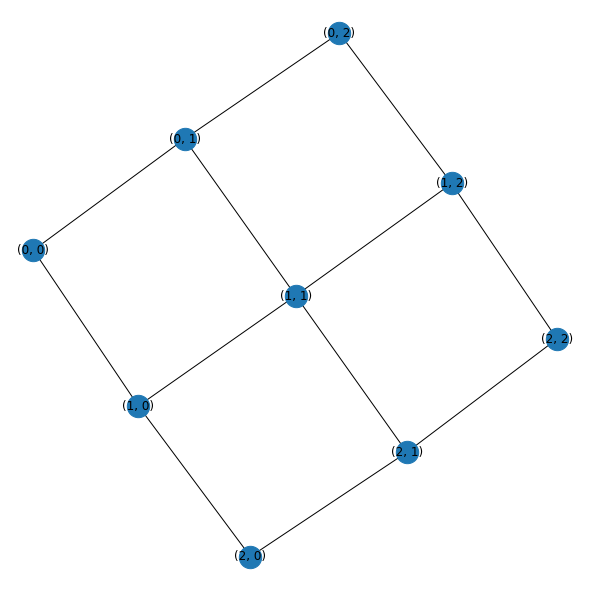

In [6]:
import imp
imp.reload(graph_gen)
N, J_interaction = graph_gen.grid_2d_interaction(n,m)

In [7]:
import graph_gen
import imp
imp.reload(graph_gen)
j = graph_gen.fixed_value(2)
J = graph_gen.set_J(J_interaction, j)
h = 1.
H = np.full((N,), h)
beta = 1

In [8]:
import model
import imp
imp.reload(model)

grid_2d = model.model_numba(N, H, J, J_interaction, beta)
grid_2d_old = model.model(N, H, J, J_interaction, beta = beta)

In [13]:
%time grid_2d.exact_numba()

Enumerating...
 0 512 0.0
 5 512 0.009765625
 10 512 0.01953125
 15 512 0.029296875
 20 512 0.0390625
 25 512 0.048828125
 30 512 0.05859375
 35 512 0.068359375
 40 512 0.078125
 45 512 0.087890625
 50 512 0.09765625
 55 512 0.107421875
 60 512 0.1171875
 65 512 0.126953125
 70 512 0.13671875
 75 512 0.146484375
 80 512 0.15625
 85 512 0.166015625
 90 512 0.17578125
 95 512 0.185546875
 100 512 0.1953125
 105 512 0.205078125
 110 512 0.21484375
 115 512 0.224609375
 120 512 0.234375
 125 512 0.244140625
 130 512 0.25390625
 135 512 0.263671875
 140 512 0.2734375
 145 512 0.283203125
 150 512 0.29296875
 155 512 0.302734375
 160 512 0.3125
 165 512 0.322265625
 170 512 0.33203125
 175 512 0.341796875
 180 512 0.3515625
 185 512 0.361328125
 190 512 0.37109375
 195 512 0.380859375
 200 512 0.390625
 205 512 0.400390625
 210 512 0.41015625
 215 512 0.419921875
 220 512 0.4296875
 225 512 0.439453125
 230 512 0.44921875
 235 512 0.458984375
 240 512 0.46875
 245 512 0.478515625
 250 512 0.

-33.00018591515321

In [14]:
%time grid_2d_old.exact();

Enumerating...
0 / 512(0.00%), E = -15.0, Z = 3.27e+06, F = -15.0
Energy: -3.67 
M: 1.0 
S: 0.000229
Free_energy: -3.667 (-3.667)
CPU times: user 47.3 ms, sys: 122 µs, total: 47.4 ms
Wall time: 46.6 ms


-33.00018591515321

In [318]:
import bp_solver
imp.reload(bp_solver)
from bp_solver import BP_solver

In [310]:
BP_tree = BP_solver(tree) 
BP_tree.converge()


... -3.975107264073226
 iter:1,  err: 32.877 free_energy -4.07... -4.198480004267052
 iter:2,  err: 4.798 free_energy -4.20... -4.1999130441048855
 iter:3,  err: 0.136 free_energy -4.20... -4.19992104794854
 iter:4,  err: 0.001 free_energy -4.20... -4.199921084317659
 iter:5,  err: 0.000 free_energy -4.20... -4.199921084351725
 iter:6,  err: 0.000 free_energy -4.20... -4.199921084351725

end 
tot_iter: 6,  error: 0.000 free_energy: -4.20
Energy: -4.2
M: 1.0
S: 8.66e-05
